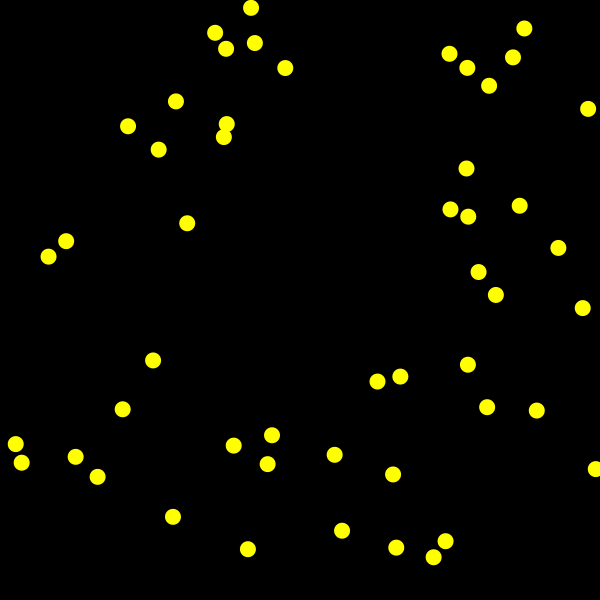

In [ ]:
import drawSvg as draw
import random
import math
import numpy as np

window_x = 600
window_y = 600
num = 50
r = 8
timestamp = 1
X = np.random.uniform(-300,300,num)
Y = np.random.uniform(-300,300,num)
V_x = np.random.uniform(-10,10,num)
V_y = np.random.uniform(-10,10,num)


def update_position(i):
    
    # update the positon of ball when striking the "wall"
    if X[i] + r > window_x/2:
        X[i] = window_x/2 - r
        V_x[i] = -1 * V_x[i]
        
    if X[i] - r < -(window_x/2):
        X[i] = -window_x/2 + r
        V_x[i] = -1 * V_x[i]
        
    if Y[i] + r > window_y/2:
        Y[i] = window_y/2 - r
        V_y[i] = -1 * V_y[i]
        
    if Y[i] - r < -(window_y/2):
        Y[i] = -window_y/2 + r
        V_y[i] = -1 * V_y[i]
    
    X[i] = X[i] + timestamp * V_x[i]
    Y[i] = Y[i] + timestamp * V_y[i]
    
    #collison with another ball
    for j in range(num):
        if (j != i) and (math.sqrt((X[i]-X[j])**2 + (Y[i]-Y[j])**2) <= 2*r):
            V_x[i] = -1 * V_x[i]
            V_y[i] = -1 * V_y[i]
            
            X[i] = X[i] + 1.5 * timestamp * V_x[i]
            Y[i] = Y[i] + 1.5 * timestamp * V_y[i]
            X[j] = X[j] + 1.5 * timestamp * V_x[j]
            Y[j] = Y[j] + 1.5 * timestamp * V_y[j]
            
def draw_ball(i):
    d.append(draw.Circle(X[i],Y[i],r,fill='yellow'))
    
def draw_frame():
    for i in range(0,num):
        update_position(i)
        draw_ball(i)
    return d

with draw.animate_jupyter(draw_frame, delay = 0.05) as anim:
    while (True):
        d = draw.Drawing(window_x,window_y,origin='center')
        d.append(draw.Rectangle(-window_x/2,-window_y/2,window_x,window_y,fill = 'black'))
        anim.draw_frame()